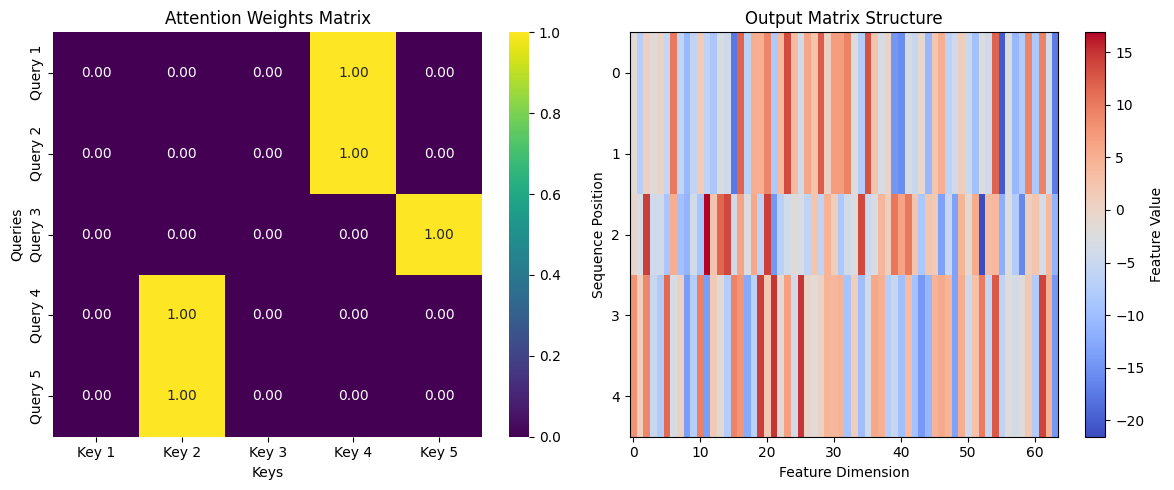

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x, axis=1):
    # Stable softmax implementation
    x_exp = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return x_exp / np.sum(x_exp, axis=axis, keepdims=True)

# Hyperparameters
N = 5          # Sequence length
d_model = 64   # Embedding dimension
d_k = d_v = d_model  # Single-head (no dimension reduction)

# Input embeddings (shape: [N, d_model])
X = np.random.randn(N, d_model)

# Weight matrices
W_Q = np.random.randn(d_model, d_k)
W_K = np.random.randn(d_model, d_k)  # Fix 1: Added K weights
W_V = np.random.randn(d_model, d_v)

# Compute Q, K, V (Corrected K computation)
Q = X @ W_Q    # Shape: [5, 64]
K = X @ W_K    # Fix 2: Use W_K instead of K.T (shape: [5, 64])
V = X @ W_V    # Shape: [5, 64]

# Attention mechanism
attention_scores = Q @ K.T  # Now works: (5,64) @ (64,5) = (5,5)
attention_scores_scaled = attention_scores / np.sqrt(d_k)
attention_weights = softmax(attention_scores_scaled, axis=1)
output = attention_weights @ V  # Shape: [5, 64]

# Visualization
plt.figure(figsize=(12, 5))

# 1. Attention Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(attention_weights,
            annot=True,
            fmt=".2f",
            cmap="viridis",
            xticklabels=[f"Key {i+1}" for i in range(N)],
            yticklabels=[f"Query {i+1}" for i in range(N)])
plt.title("Attention Weights Matrix")
plt.xlabel("Keys")
plt.ylabel("Queries")

# 2. Output Structure
plt.subplot(1, 2, 2)
plt.imshow(output, cmap="coolwarm", aspect="auto")
plt.title("Output Matrix Structure")
plt.xlabel("Feature Dimension")
plt.ylabel("Sequence Position")
plt.colorbar(label="Feature Value")

plt.tight_layout()
plt.show()